# **Carga y Análisis Exploratorio de Datos**

---


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

bank_marketing = fetch_ucirepo(id=222)

X = bank_marketing.data.features
y = bank_marketing.data.targets

print(bank_marketing.metadata)

print("\n")

print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
import pandas as pd
import numpy as np

print(X.head())

print("\n")

# Información general del dataset (tipos de datos y valores no nulos)
X.info()

print("\n")

print(X.describe(include='all'))

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (t

In [ ]:
# Valores nulos
print(np.sum(X.isnull()))

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day_of_week'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

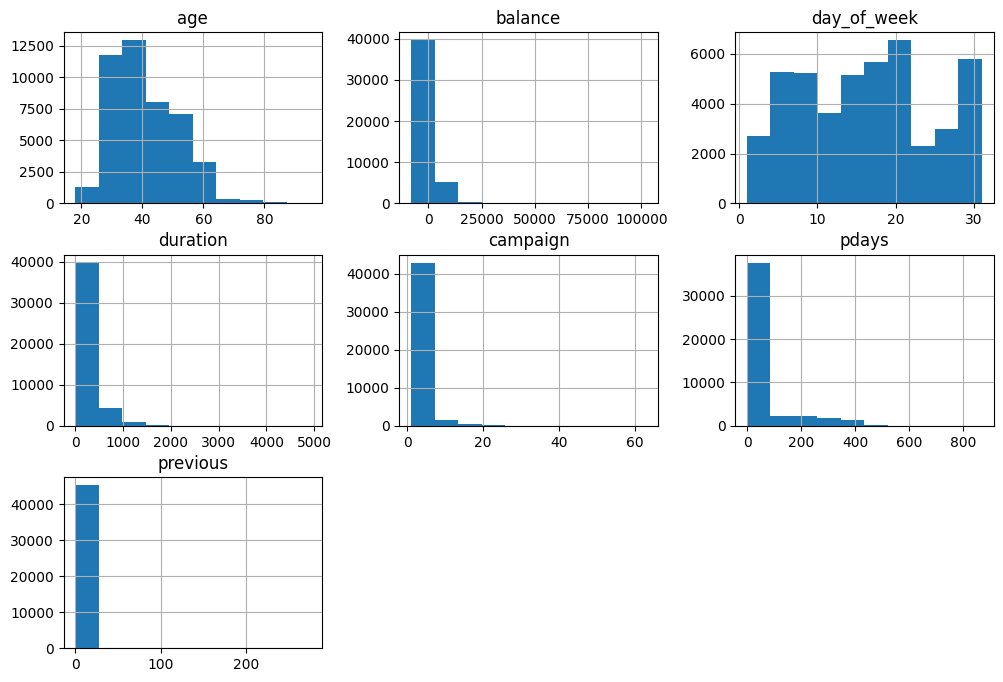

In [ ]:
# Histogramas para variables numéricas
X.hist(figsize=(12, 8))

# **Preprocesamiento**

---


In [ ]:
col_cat = X.select_dtypes(include=['object']).columns
columnas_objetivo = col_cat[X[col_cat].isnull().any()]

for c in columnas_objetivo:
    moda = X[c].mode()[0]
    X[c] = X[c].fillna(moda) # Reemplazamos NaN con la moda

# Comprobamos que ya no haya ausentes
print(np.sum(X.isnull()))

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


<ipython-input-6-f8519d80699a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = X[c].fillna(moda) # Reemplazamos NaN con la moda
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Label Encoding (para los atributos que tienen alguna relación de orden o son binarios)
label_encoder = LabelEncoder()
for col in ['education', 'default', 'housing', 'loan', 'month']:
    X[col] = label_encoder.fit_transform(X[col])

<ipython-input-7-c8e478e326cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-7-c8e478e326cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-7-c8e478e326cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Seleccionamos las columnas categóricas restantes
col_cat = ['job', 'marital', 'contact', 'poutcome']

onehot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

transformer = ColumnTransformer(
    transformers=[('onehot', onehot_encoder, col_cat)],
    remainder='passthrough'  # Mantenemos las otras columnas sin cambios
)

X_encoded = transformer.fit_transform(X)

X_encoded = pd.DataFrame(X_encoded, columns=transformer.get_feature_names_out())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onehot__job_admin.         45211 non-null  float64
 1   onehot__job_blue-collar    45211 non-null  float64
 2   onehot__job_entrepreneur   45211 non-null  float64
 3   onehot__job_housemaid      45211 non-null  float64
 4   onehot__job_management     45211 non-null  float64
 5   onehot__job_retired        45211 non-null  float64
 6   onehot__job_self-employed  45211 non-null  float64
 7   onehot__job_services       45211 non-null  float64
 8   onehot__job_student        45211 non-null  float64
 9   onehot__job_technician     45211 non-null  float64
 10  onehot__job_unemployed     45211 non-null  float64
 11  onehot__marital_divorced   45211 non-null  float64
 12  onehot__marital_married    45211 non-null  float64
 13  onehot__marital_single     45211 non-null  flo

array([[<Axes: title={'center': 'onehot__job_admin.'}>,
        <Axes: title={'center': 'onehot__job_blue-collar'}>,
        <Axes: title={'center': 'onehot__job_entrepreneur'}>,
        <Axes: title={'center': 'onehot__job_housemaid'}>,
        <Axes: title={'center': 'onehot__job_management'}>,
        <Axes: title={'center': 'onehot__job_retired'}>],
       [<Axes: title={'center': 'onehot__job_self-employed'}>,
        <Axes: title={'center': 'onehot__job_services'}>,
        <Axes: title={'center': 'onehot__job_student'}>,
        <Axes: title={'center': 'onehot__job_technician'}>,
        <Axes: title={'center': 'onehot__job_unemployed'}>,
        <Axes: title={'center': 'onehot__marital_divorced'}>],
       [<Axes: title={'center': 'onehot__marital_married'}>,
        <Axes: title={'center': 'onehot__marital_single'}>,
        <Axes: title={'center': 'onehot__contact_cellular'}>,
        <Axes: title={'center': 'onehot__contact_telephone'}>,
        <Axes: title={'center': 'oneh

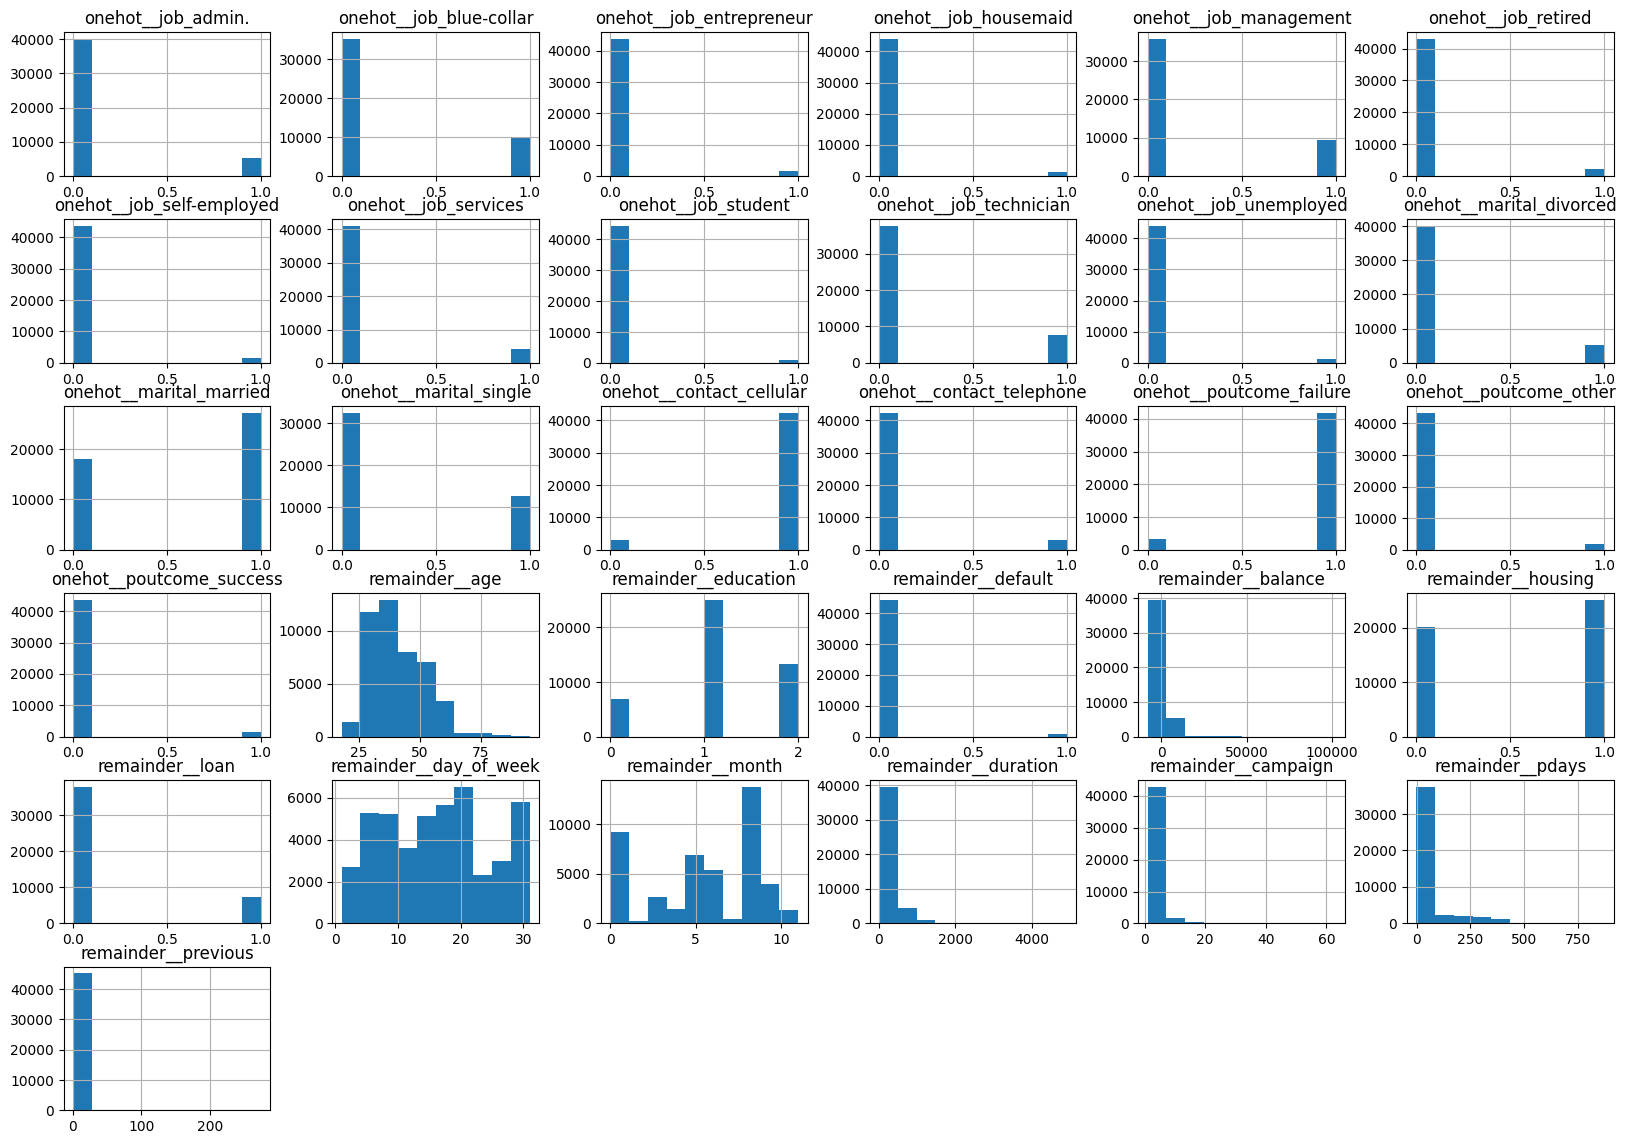

In [ ]:
# Observamos el dataset resultante
X_encoded.info()
X_encoded.head()
X_encoded.hist(figsize=(20, 14))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_encoded_normalized = scaler.fit_transform(X_encoded)

X_encoded_normalized = pd.DataFrame(X_encoded_normalized, columns=transformer.get_feature_names_out())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   onehot__job_admin.         45211 non-null  float64
 1   onehot__job_blue-collar    45211 non-null  float64
 2   onehot__job_entrepreneur   45211 non-null  float64
 3   onehot__job_housemaid      45211 non-null  float64
 4   onehot__job_management     45211 non-null  float64
 5   onehot__job_retired        45211 non-null  float64
 6   onehot__job_self-employed  45211 non-null  float64
 7   onehot__job_services       45211 non-null  float64
 8   onehot__job_student        45211 non-null  float64
 9   onehot__job_technician     45211 non-null  float64
 10  onehot__job_unemployed     45211 non-null  float64
 11  onehot__marital_divorced   45211 non-null  float64
 12  onehot__marital_married    45211 non-null  float64
 13  onehot__marital_single     45211 non-null  flo

array([[<Axes: title={'center': 'onehot__job_admin.'}>,
        <Axes: title={'center': 'onehot__job_blue-collar'}>,
        <Axes: title={'center': 'onehot__job_entrepreneur'}>,
        <Axes: title={'center': 'onehot__job_housemaid'}>,
        <Axes: title={'center': 'onehot__job_management'}>,
        <Axes: title={'center': 'onehot__job_retired'}>],
       [<Axes: title={'center': 'onehot__job_self-employed'}>,
        <Axes: title={'center': 'onehot__job_services'}>,
        <Axes: title={'center': 'onehot__job_student'}>,
        <Axes: title={'center': 'onehot__job_technician'}>,
        <Axes: title={'center': 'onehot__job_unemployed'}>,
        <Axes: title={'center': 'onehot__marital_divorced'}>],
       [<Axes: title={'center': 'onehot__marital_married'}>,
        <Axes: title={'center': 'onehot__marital_single'}>,
        <Axes: title={'center': 'onehot__contact_cellular'}>,
        <Axes: title={'center': 'onehot__contact_telephone'}>,
        <Axes: title={'center': 'oneh

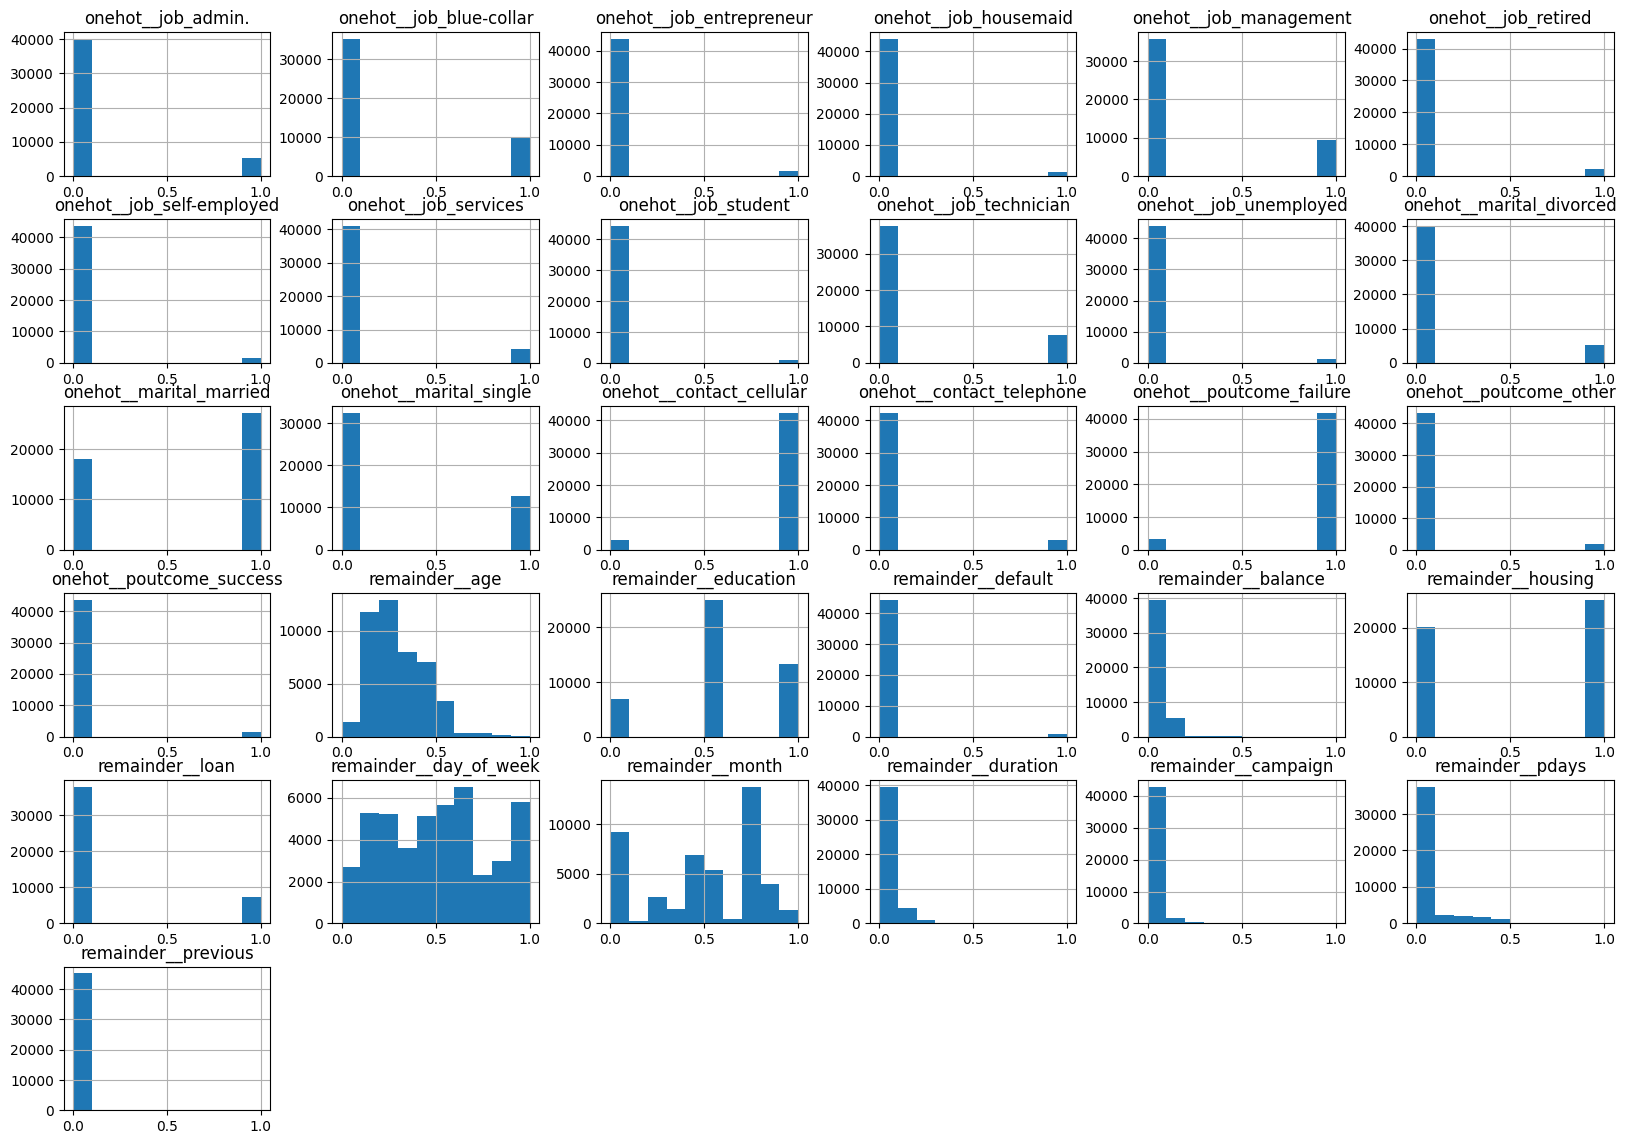

In [ ]:
# Observamos el dataset resultante
X_encoded_normalized.info()
X_encoded_normalized.head()
X_encoded_normalized.hist(figsize=(20, 14))

In [ ]:
# Transformamos 'y' a variable numérica para trabajar bien con los clasificadores
y_encoded = label_encoder.fit_transform(y)
y_encoded = pd.DataFrame(y_encoded, columns=['y'])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


array([[<Axes: title={'center': 'y'}>]], dtype=object)

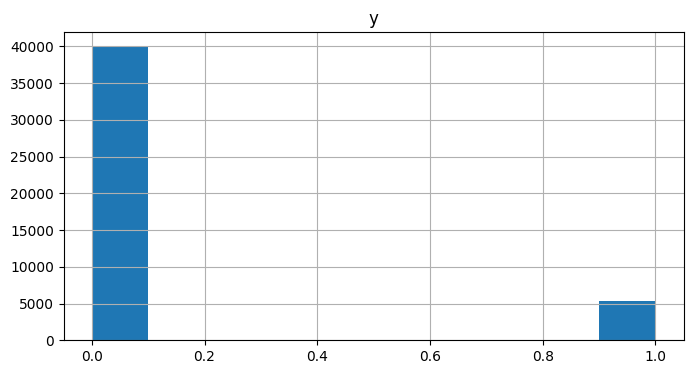

In [ ]:
y_encoded.info()
y_encoded.hist(figsize=(8, 4))

# **Estudio de los parámetros apropiados para cada algoritmo de clasificación**

---


## **DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded_normalized, y_encoded, test_size=0.2, random_state=33)

# Definimos los parámetros a evaluar
criterios = ['gini', 'entropy']
profundidades = [3, 5, 10, 15]

resultados = []

# Iteramos sobre los parámetros para cada profundidad
for criterio in criterios:
    for profundidad in profundidades:

        modelo = DecisionTreeClassifier(criterion=criterio, max_depth=profundidad, random_state=33)
        modelo.fit(X_train, y_train)

        # Predicciones
        y_pred = modelo.predict(X_test)
        y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para AUC-ROC

        # Métricas
        matriz_confusion = confusion_matrix(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_roc = roc_auc_score(y_test, y_prob)

        # Almacenamos los resultados
        resultados.append([criterio, profundidad, precision, recall, f1, auc_roc, matriz_confusion])

# Creamos un DataFrame con los resultados
resultadosAD_df = pd.DataFrame(resultados, columns=['Criterio', 'Profundidad', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Matriz de Confusión'])

# Mostramos resultados
display(resultadosAD_df)

,Criterio,Profundidad,Precision,Recall,F1-Score,AUC-ROC,Matriz de Confusión
0,gini,3,0.618893,0.362250,0.457005,0.785431,"[[7760, 234], [669, 380]]"
1,gini,5,0.643617,0.346044,0.450093,0.849346,"[[7793, 201], [686, 363]]"
2,gini,10,0.584735,0.430887,0.496158,0.839178,"[[7673, 321], [597, 452]]"
3,gini,15,0.525172,0.437560,0.477379,0.734434,"[[7579, 415], [590, 459]]"
4,entropy,3,0.625912,0.326978,0.429555,0.825583,"[[7789, 205], [706, 343]]"
5,entropy,5,0.639594,0.360343,0.460976,0.869950,"[[7781, 213], [671, 378]]"
6,entropy,10,0.575923,0.401335,0.473034,0.843856,"[[7684, 310], [628, 421]]"
7,entropy,15,0.525346,0.434700,0.475743,0.773020,"[[7582, 412], [593, 456]]"


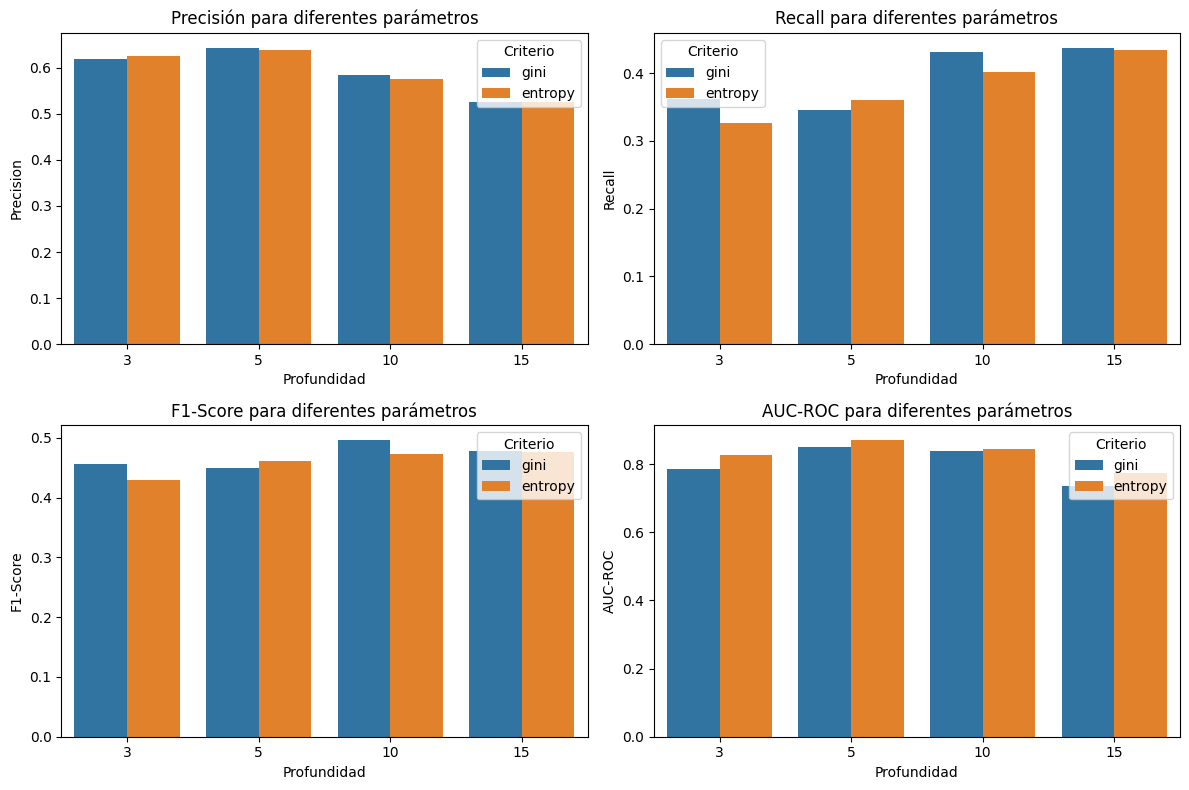

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico para Precision
sns.barplot(x='Profundidad', y='Precision', hue='Criterio', data=resultadosAD_df, ax=axes[0, 0])
axes[0, 0].set_title('Precisión para diferentes parámetros')

# Gráfico para Recall
sns.barplot(x='Profundidad', y='Recall', hue='Criterio', data=resultadosAD_df, ax=axes[0, 1])
axes[0, 1].set_title('Recall para diferentes parámetros')

# Gráfico para F1-Score
sns.barplot(x='Profundidad', y='F1-Score', hue='Criterio', data=resultadosAD_df, ax=axes[1, 0])
axes[1, 0].set_title('F1-Score para diferentes parámetros')

# Gráfico para AUC-ROC
sns.barplot(x='Profundidad', y='AUC-ROC', hue='Criterio', data=resultadosAD_df, ax=axes[1, 1])
axes[1, 1].set_title('AUC-ROC para diferentes parámetros')


plt.tight_layout()
plt.show()

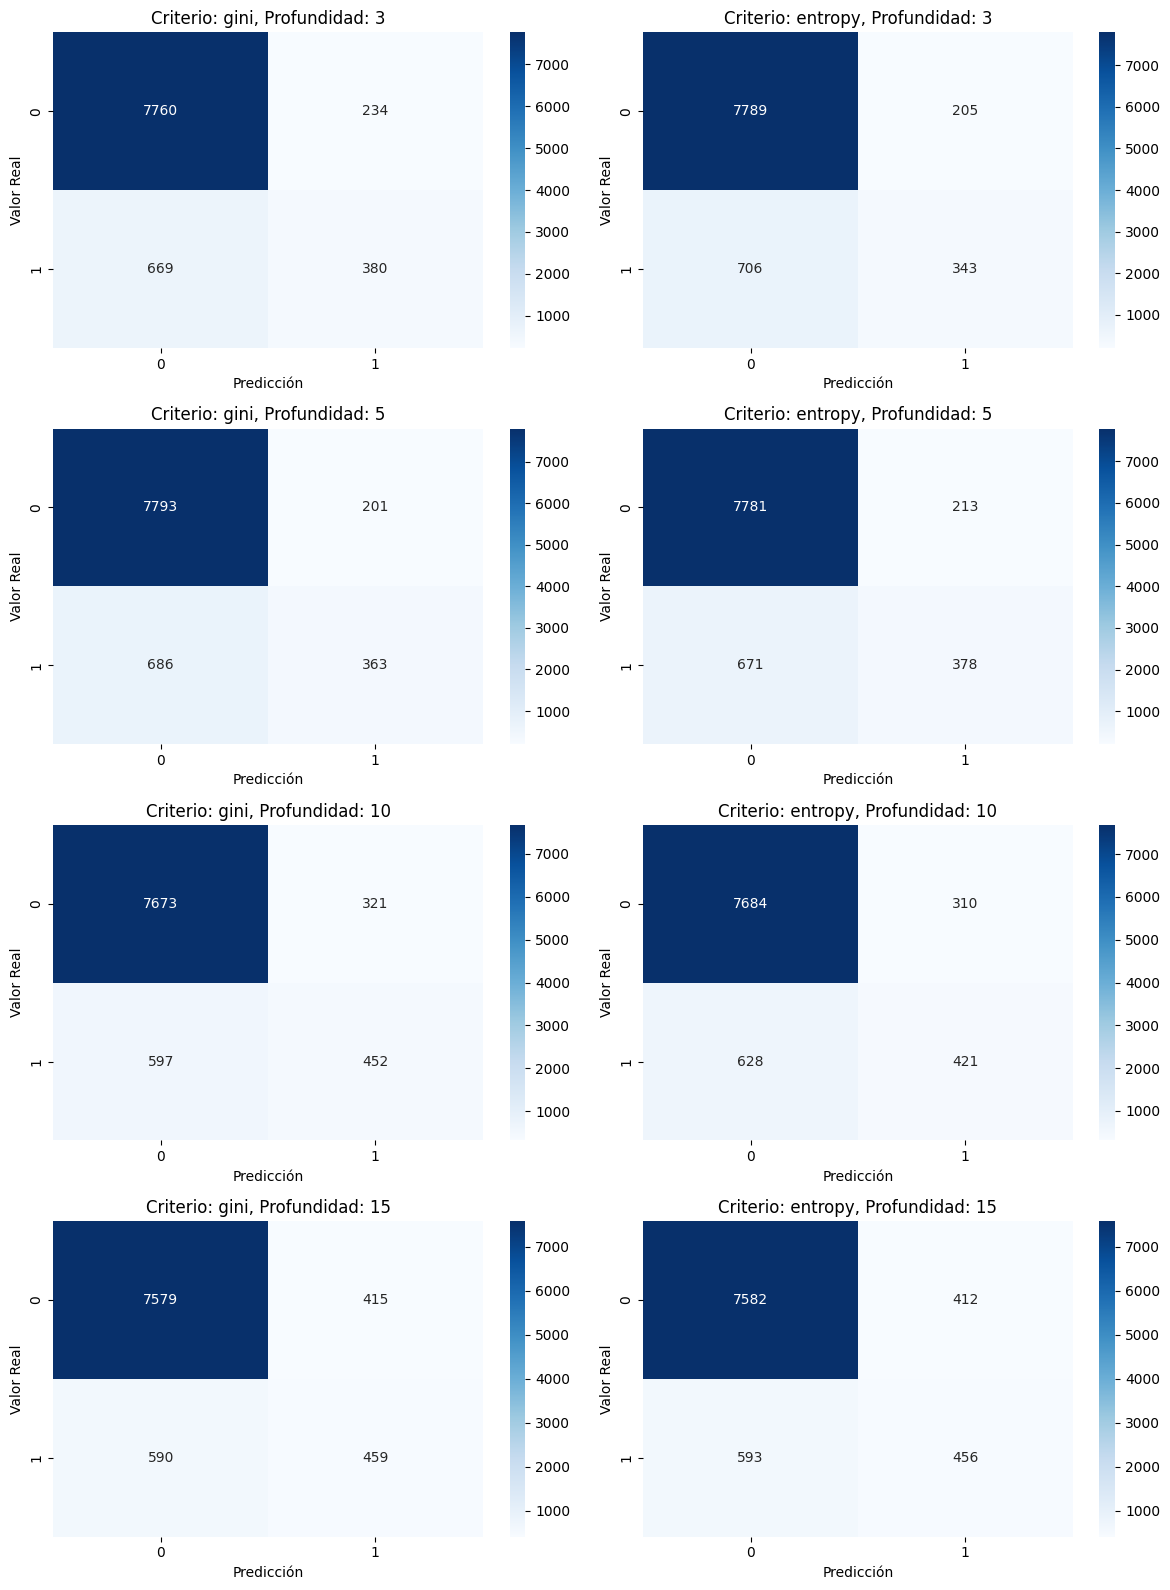

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))  # 4 filas, 2 columnas

resultados_gini = resultadosAD_df[resultadosAD_df['Criterio'] == 'gini']
resultados_entropy = resultadosAD_df[resultadosAD_df['Criterio'] == 'entropy']

# Matrices de confusión para 'gini'
for i, row in resultados_gini.iterrows():
    profundidad = row['Profundidad']
    matriz_confusion = row['Matriz de Confusión']

    ax = axes[resultados_gini.index.get_loc(i), 0]
    sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Criterio: gini, Profundidad: {profundidad}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor Real')

# Matrices de confusión para 'entropy'
for i, row in resultados_entropy.iterrows():
    profundidad = row['Profundidad']
    matriz_confusion = row['Matriz de Confusión']

    ax = axes[resultados_entropy.index.get_loc(i), 1]
    sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f'Criterio: entropy, Profundidad: {profundidad}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded_normalized, y_encoded, test_size=0.2, random_state=33)

# Definimos los parámetros a evaluar
num_arboles = [100, 300]
num_atributos = [10, 20]  # Número de atributos máximo elegible por nodo
profundidades = [3, 10]  # Profundidad máxima de los árboles

resultados = []

# Iteramos sobre los parámetros
for n_arboles in num_arboles:
    for n_atributos in num_atributos:
        for profundidad in profundidades:

            modelo = RandomForestClassifier(n_estimators=n_arboles, max_features=n_atributos, max_depth=profundidad, random_state=33)
            modelo.fit(X_train, y_train.values.ravel())

            # Predicciones
            y_pred = modelo.predict(X_test)
            y_prob = modelo.predict_proba(X_test)[:, 1]

            # Métricas
            matriz_confusion = confusion_matrix(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc_roc = roc_auc_score(y_test, y_prob)

            # Almacenamos los resultados
            resultados.append([n_arboles, n_atributos, profundidad, precision, recall, f1, auc_roc, matriz_confusion])

# Creamos un DataFrame con los resultados
resultadosRF_df = pd.DataFrame(resultados, columns=['n_arboles', 'n_atributos', 'profundidad', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Matriz de Confusión'])

display(resultadosRF_df)

,n_arboles,n_atributos,profundidad,Precision,Recall,F1-Score,AUC-ROC,Matriz de Confusión
0,100,10,3,0.748918,0.164919,0.270313,0.880098,"[[7936, 58], [876, 173]]"
1,100,10,10,0.649435,0.383222,0.482014,0.916641,"[[7777, 217], [647, 402]]"
2,100,20,3,0.645349,0.317445,0.425559,0.865928,"[[7811, 183], [716, 333]]"
3,100,20,10,0.640288,0.424214,0.510321,0.913974,"[[7744, 250], [604, 445]]"
4,300,10,3,0.750000,0.165872,0.271663,0.882025,"[[7936, 58], [875, 174]]"
5,300,10,10,0.638535,0.382269,0.478235,0.916433,"[[7767, 227], [648, 401]]"
6,300,20,3,0.633929,0.338418,0.441268,0.868650,"[[7789, 205], [694, 355]]"
7,300,20,10,0.636494,0.422307,0.507736,0.913510,"[[7741, 253], [606, 443]]"


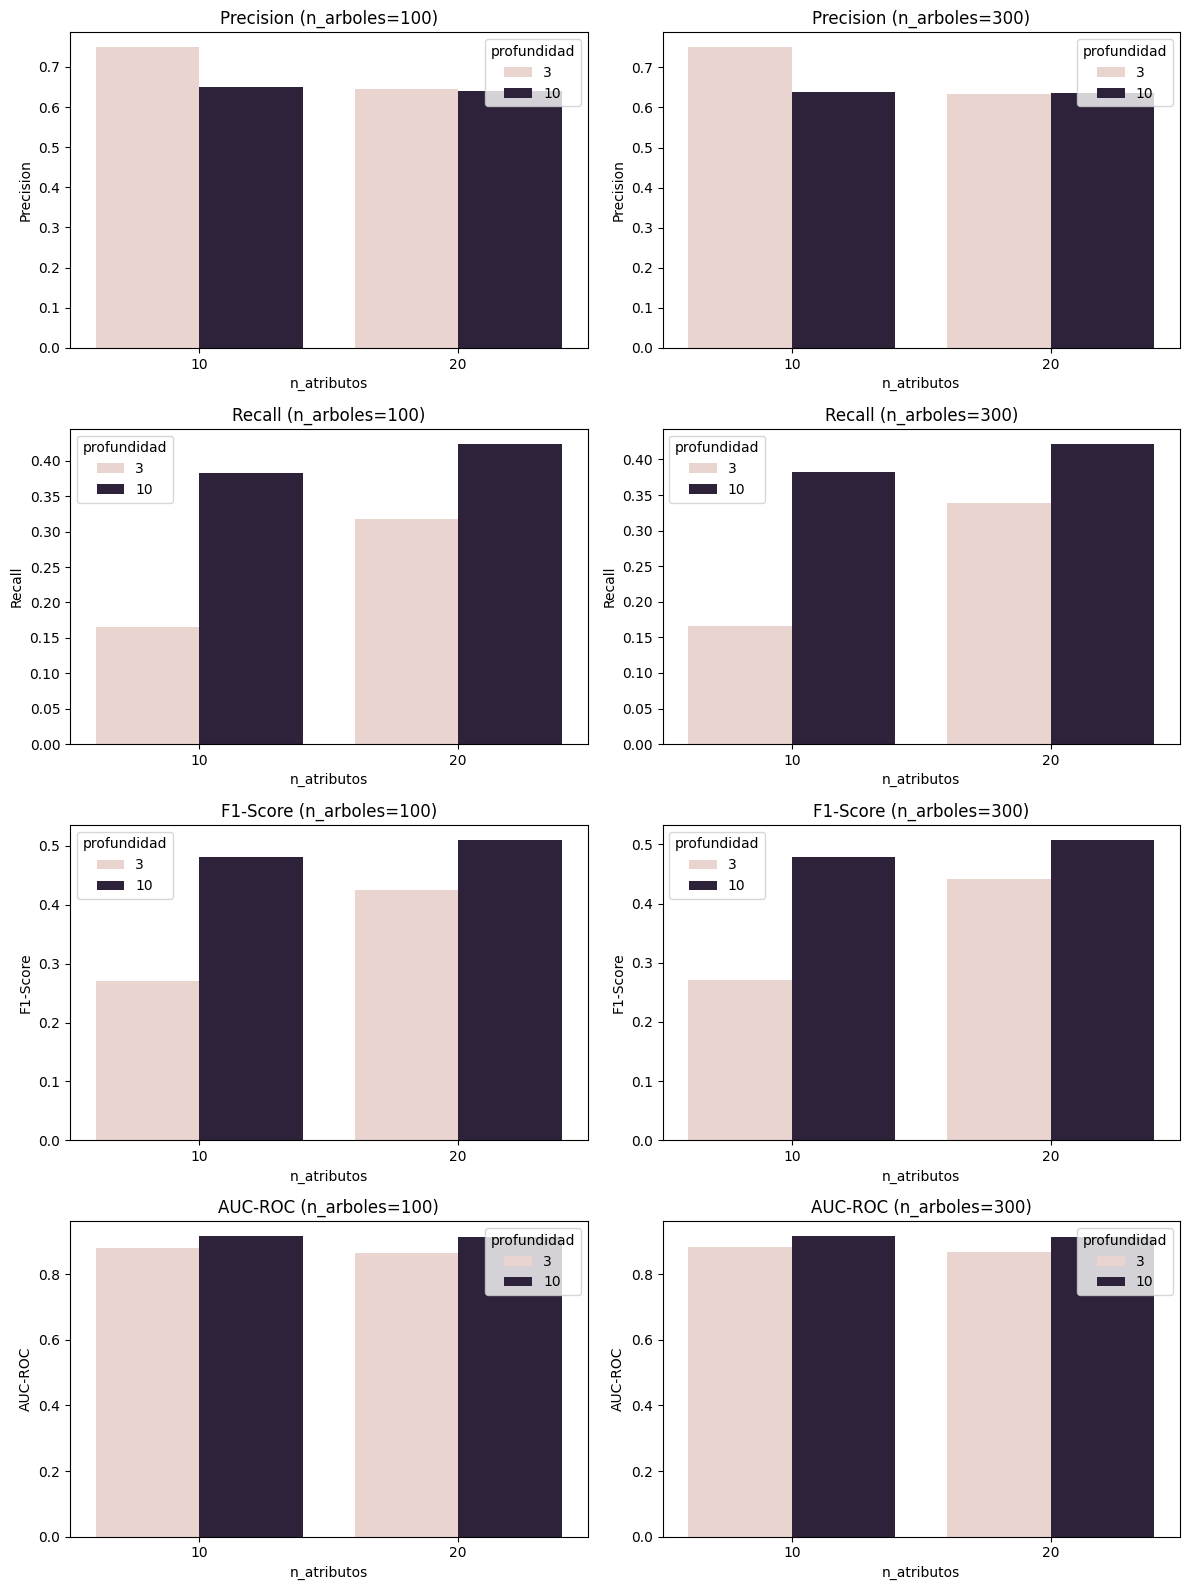

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Filtramos los datos para cada valor de 'n_arboles'
resultados_100 = resultadosRF_df[resultadosRF_df['n_arboles'] == 100]
resultados_300 = resultadosRF_df[resultadosRF_df['n_arboles'] == 300]

# Gráficos para 'n_arboles' = 100 (columna 1)
sns.barplot(x='n_atributos', y='Precision', hue='profundidad', data=resultados_100, ax=axes[0, 0])
axes[0, 0].set_title('Precision (n_arboles=100)')

sns.barplot(x='n_atributos', y='Recall', hue='profundidad', data=resultados_100, ax=axes[1, 0])
axes[1, 0].set_title('Recall (n_arboles=100)')

sns.barplot(x='n_atributos', y='F1-Score', hue='profundidad', data=resultados_100, ax=axes[2, 0])
axes[2, 0].set_title('F1-Score (n_arboles=100)')

sns.barplot(x='n_atributos', y='AUC-ROC', hue='profundidad', data=resultados_100, ax=axes[3, 0])
axes[3, 0].set_title('AUC-ROC (n_arboles=100)')

# Gráficos para 'n_arboles' = 300 (columna 2)
sns.barplot(x='n_atributos', y='Precision', hue='profundidad', data=resultados_300, ax=axes[0, 1])
axes[0, 1].set_title('Precision (n_arboles=300)')

sns.barplot(x='n_atributos', y='Recall', hue='profundidad', data=resultados_300, ax=axes[1, 1])
axes[1, 1].set_title('Recall (n_arboles=300)')

sns.barplot(x='n_atributos', y='F1-Score', hue='profundidad', data=resultados_300, ax=axes[2, 1])
axes[2, 1].set_title('F1-Score (n_arboles=300)')

sns.barplot(x='n_atributos', y='AUC-ROC', hue='profundidad', data=resultados_300, ax=axes[3, 1])
axes[3, 1].set_title('AUC-ROC (n_arboles=300)')

plt.tight_layout()
plt.show()

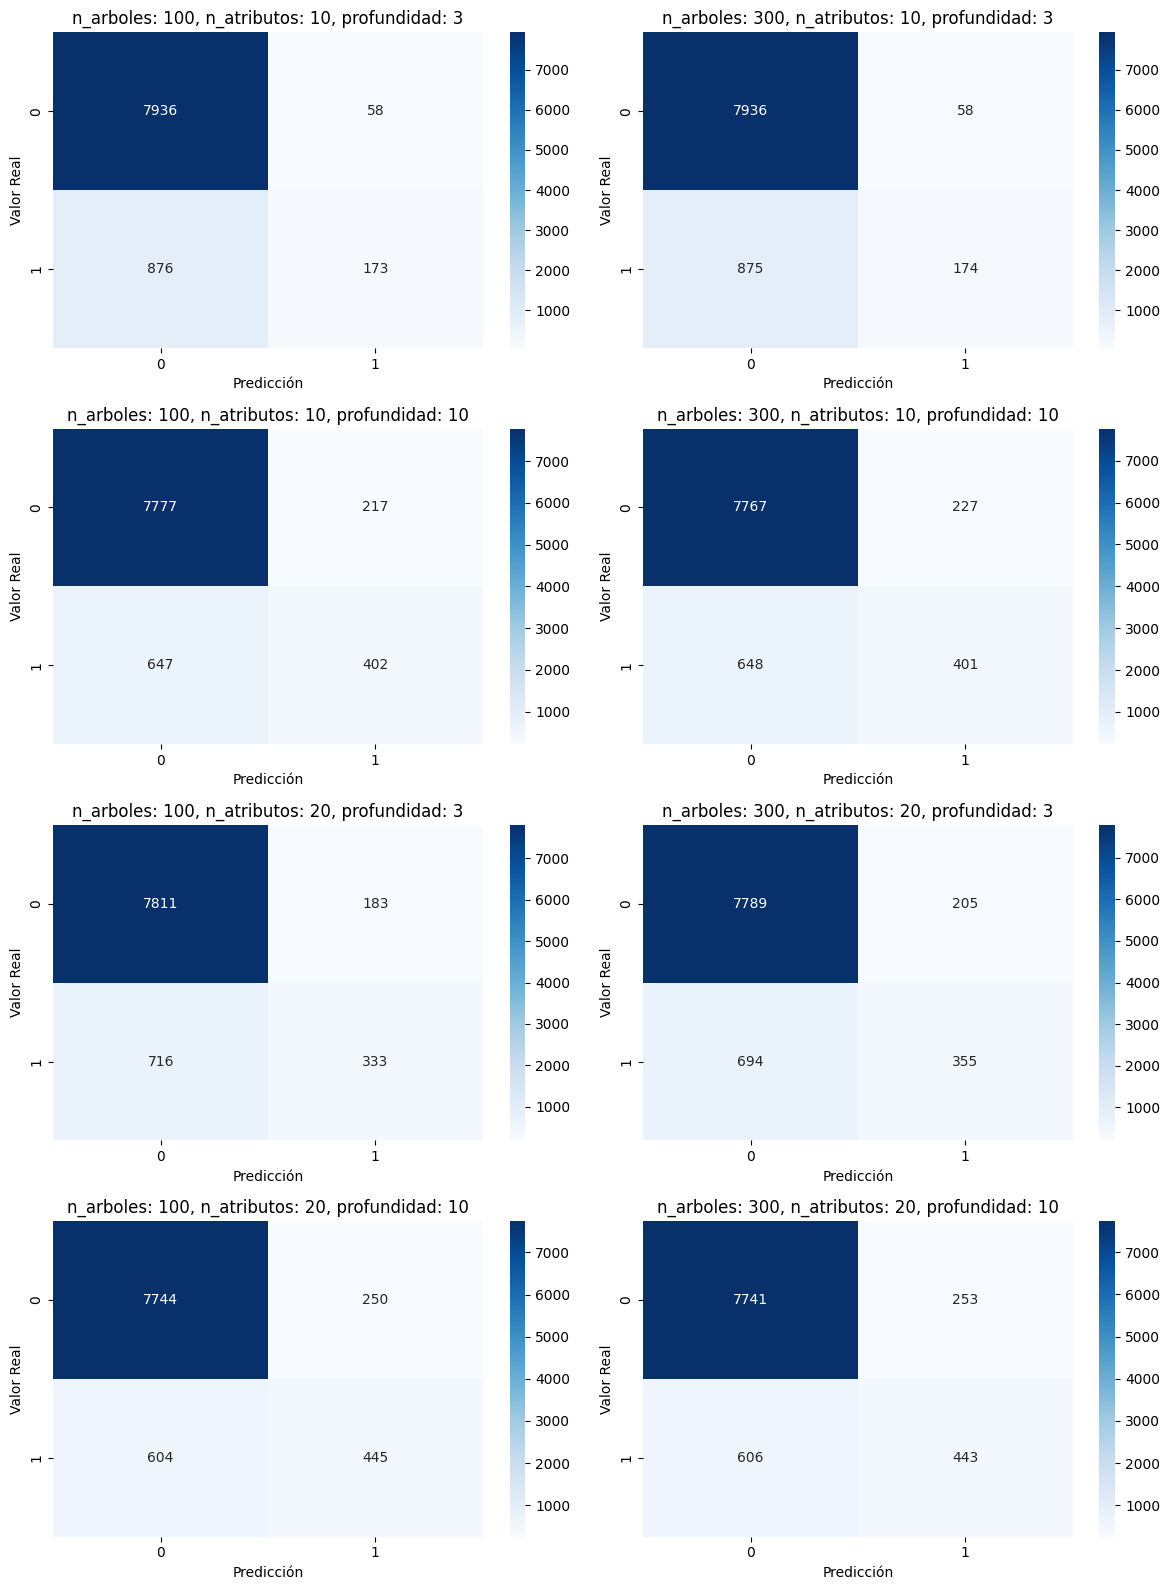

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Filtramos los datos para cada valor de 'n_arboles'
resultados_100 = resultadosRF_df[resultadosRF_df['n_arboles'] == 100]
resultados_300 = resultadosRF_df[resultadosRF_df['n_arboles'] == 300]

# Iteramos sobre las filas (combinaciones de n_atributos y profundidad)
for i in range(4):

    # Obtenemos los datos para n_arboles=100
    fila_100 = resultados_100.iloc[i]
    matriz_confusion_100 = fila_100['Matriz de Confusión']
    n_atributos_100 = fila_100['n_atributos']
    profundidad_100 = fila_100['profundidad']

    # Dibujamos la matriz de confusión en la columna 1
    sns.heatmap(matriz_confusion_100, annot=True, fmt="d", cmap="Blues", ax=axes[i, 0])
    axes[i, 0].set_title(f'n_arboles: 100, n_atributos: {n_atributos_100}, profundidad: {profundidad_100}')
    axes[i, 0].set_xlabel('Predicción')
    axes[i, 0].set_ylabel('Valor Real')

    # Obtenemos los datos para n_arboles=300
    fila_300 = resultados_300.iloc[i]
    matriz_confusion_300 = fila_300['Matriz de Confusión']
    n_atributos_300 = fila_300['n_atributos']
    profundidad_300 = fila_300['profundidad']

    # Dibujamos la matriz de confusión en la columna 2
    sns.heatmap(matriz_confusion_300, annot=True, fmt="d", cmap="Blues", ax=axes[i, 1])
    axes[i, 1].set_title(f'n_arboles: 300, n_atributos: {n_atributos_300}, profundidad: {profundidad_300}')
    axes[i, 1].set_xlabel('Predicción')
    axes[i, 1].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

## **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded_normalized, y_encoded, test_size=0.2, random_state=33)

# Definimos los parámetros a evaluar
num_arboles = [100, 300]
tasas_aprendizaje = [0.1, 0.01]
profundidades = [3, 10]

resultados = []

# Iteramos sobre los parámetros
for n_arboles in num_arboles:
    for tasa_aprendizaje in tasas_aprendizaje:
        for profundidad in profundidades:

            modelo = GradientBoostingClassifier(n_estimators=n_arboles, learning_rate=tasa_aprendizaje, max_depth=profundidad, random_state=33)
            modelo.fit(X_train, y_train.values.ravel())

            # Predicciones
            y_pred = modelo.predict(X_test)
            y_prob = modelo.predict_proba(X_test)[:, 1]

            # Métricas
            matriz_confusion = confusion_matrix(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            auc_roc = roc_auc_score(y_test, y_prob)

            # Almacenamos los resultados
            resultados.append([n_arboles, tasa_aprendizaje, profundidad, precision, recall, f1, auc_roc, matriz_confusion])

# Creamos un DataFrame con los resultados
resultadosGB_df = pd.DataFrame(resultados, columns=['n_arboles', 'tasa_aprendizaje', 'profundidad', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Matriz de Confusión'])

# Mostramos resultados
display(resultadosGB_df)

,n_arboles,tasa_aprendizaje,profundidad,Precision,Recall,F1-Score,AUC-ROC,Matriz de Confusión
0,100,0.10,3,0.632987,0.406101,0.494774,0.916283,"[[7747, 247], [623, 426]]"
1,100,0.10,10,0.619403,0.474738,0.537507,0.924113,"[[7688, 306], [551, 498]]"
2,100,0.01,3,0.793651,0.095329,0.170213,0.871310,"[[7968, 26], [949, 100]]"
3,100,0.01,10,0.691057,0.162059,0.262548,0.904206,"[[7918, 76], [879, 170]]"
4,300,0.10,3,0.641958,0.437560,0.520408,0.925093,"[[7738, 256], [590, 459]]"
5,300,0.10,10,0.625945,0.473785,0.539338,0.922387,"[[7697, 297], [552, 497]]"
6,300,0.01,3,0.677895,0.306959,0.422572,0.895571,"[[7841, 153], [727, 322]]"
7,300,0.01,10,0.608631,0.389895,0.475305,0.919040,"[[7731, 263], [640, 409]]"


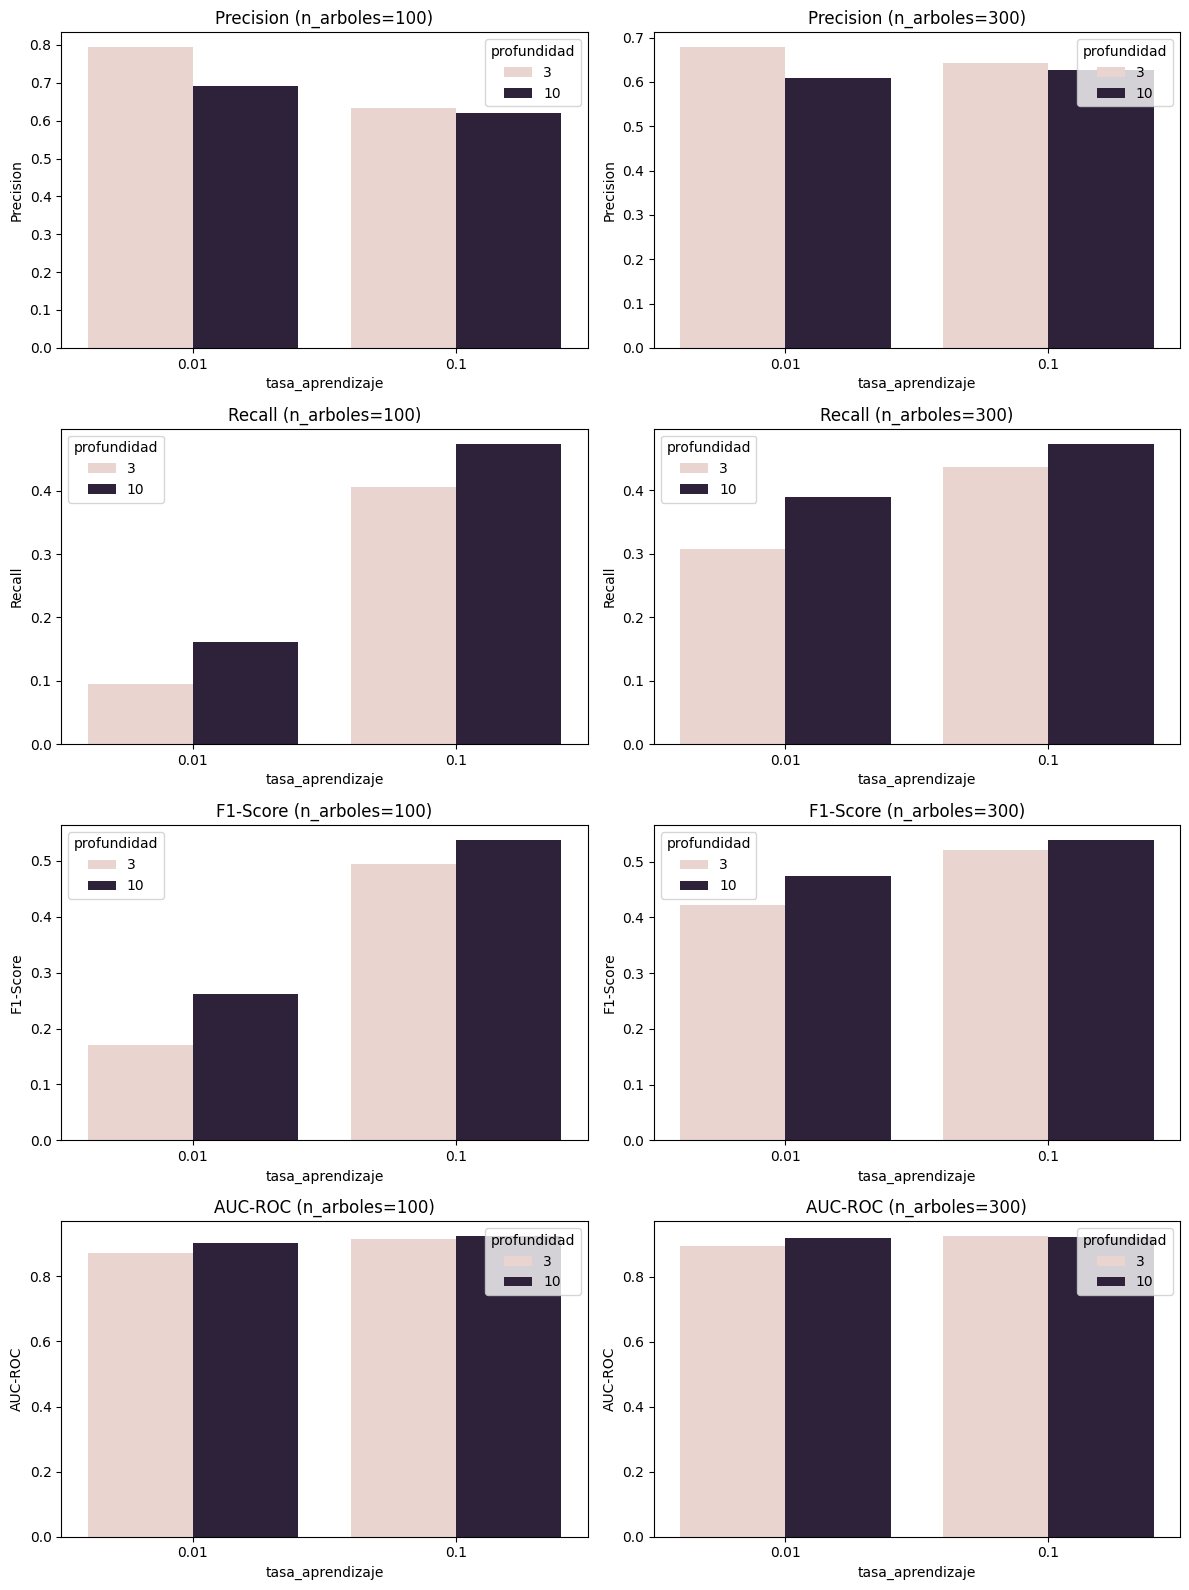

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Filtramos los datos para cada valor de 'n_arboles'
resultados_100 = resultadosGB_df[resultadosGB_df['n_arboles'] == 100]
resultados_300 = resultadosGB_df[resultadosGB_df['n_arboles'] == 300]

# Gráficos para 'n_arboles' = 100 (columna 1)
sns.barplot(x='tasa_aprendizaje', y='Precision', hue='profundidad', data=resultados_100, ax=axes[0, 0])
axes[0, 0].set_title('Precision (n_arboles=100)')

sns.barplot(x='tasa_aprendizaje', y='Recall', hue='profundidad', data=resultados_100, ax=axes[1, 0])
axes[1, 0].set_title('Recall (n_arboles=100)')

sns.barplot(x='tasa_aprendizaje', y='F1-Score', hue='profundidad', data=resultados_100, ax=axes[2, 0])
axes[2, 0].set_title('F1-Score (n_arboles=100)')

sns.barplot(x='tasa_aprendizaje', y='AUC-ROC', hue='profundidad', data=resultados_100, ax=axes[3, 0])
axes[3, 0].set_title('AUC-ROC (n_arboles=100)')

# Gráficos para 'n_arboles' = 300 (columna 2)
sns.barplot(x='tasa_aprendizaje', y='Precision', hue='profundidad', data=resultados_300, ax=axes[0, 1])
axes[0, 1].set_title('Precision (n_arboles=300)')

sns.barplot(x='tasa_aprendizaje', y='Recall', hue='profundidad', data=resultados_300, ax=axes[1, 1])
axes[1, 1].set_title('Recall (n_arboles=300)')

sns.barplot(x='tasa_aprendizaje', y='F1-Score', hue='profundidad', data=resultados_300, ax=axes[2, 1])
axes[2, 1].set_title('F1-Score (n_arboles=300)')

sns.barplot(x='tasa_aprendizaje', y='AUC-ROC', hue='profundidad', data=resultados_300, ax=axes[3, 1])
axes[3, 1].set_title('AUC-ROC (n_arboles=300)')

plt.tight_layout()
plt.show()

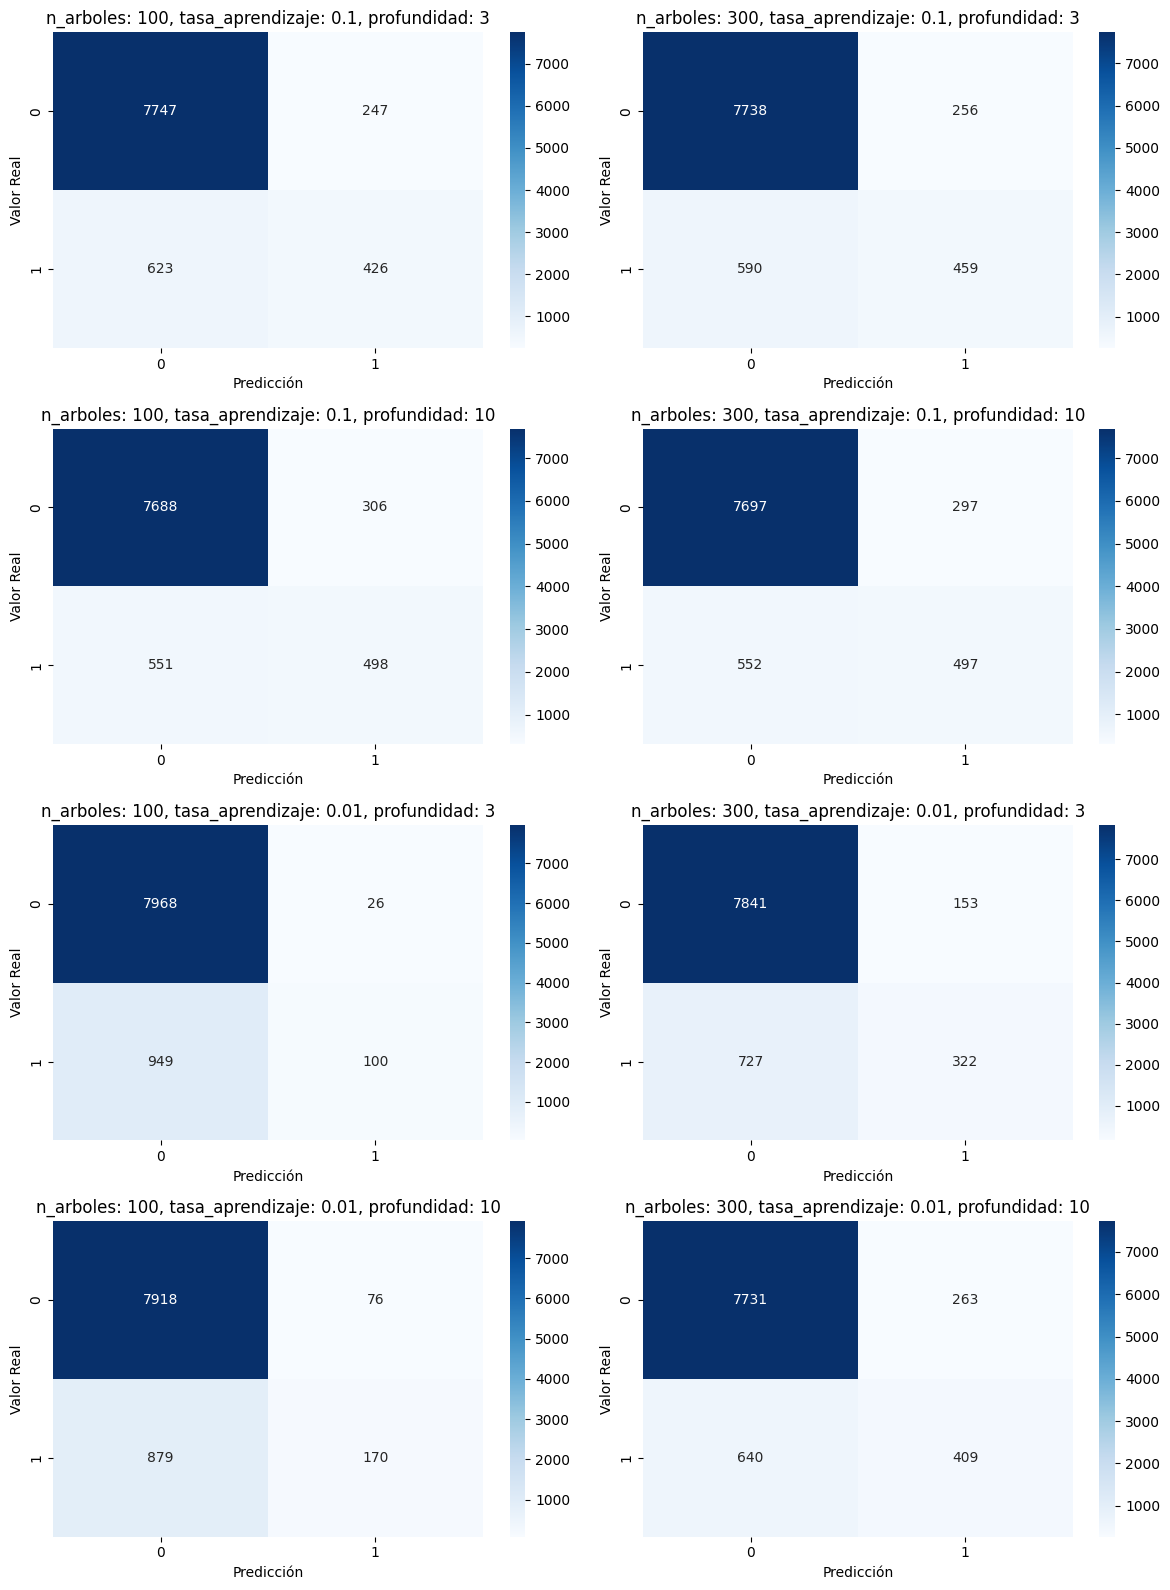

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Filtramos los datos para cada valor de 'n_arboles'
resultados_100 = resultadosGB_df[resultadosGB_df['n_arboles'] == 100]
resultados_300 = resultadosGB_df[resultadosGB_df['n_arboles'] == 300]

# Iteramos sobre las filas (combinaciones de tasa_aprendizaje y profundidad)
for i in range(4):

    # Obtenemos los datos para n_arboles=100
    row_100 = resultados_100.iloc[i]
    matriz_confusion_100 = row_100['Matriz de Confusión']
    tasa_aprendizaje_100 = row_100['tasa_aprendizaje']
    profundidad_100 = row_100['profundidad']

    # Dibujamos la matriz de confusión en la columna 1
    sns.heatmap(matriz_confusion_100, annot=True, fmt="d", cmap="Blues", ax=axes[i, 0])
    axes[i, 0].set_title(f'n_arboles: 100, tasa_aprendizaje: {tasa_aprendizaje_100}, profundidad: {profundidad_100}')
    axes[i, 0].set_xlabel('Predicción')
    axes[i, 0].set_ylabel('Valor Real')

    # Obtenemos los datos para n_arboles=300
    row_300 = resultados_300.iloc[i]
    matriz_confusion_300 = row_300['Matriz de Confusión']
    tasa_aprendizaje_300 = row_300['tasa_aprendizaje']
    profundidad_300 = row_300['profundidad']

    # Dibujamos la matriz de confusión en la columna 2
    sns.heatmap(matriz_confusion_300, annot=True, fmt="d", cmap="Blues", ax=axes[i, 1])
    axes[i, 1].set_title(f'n_arboles: 300, tasa_aprendizaje: {tasa_aprendizaje_300}, profundidad: {profundidad_300}')
    axes[i, 1].set_xlabel('Predicción')
    axes[i, 1].set_ylabel('Valor Real')

plt.tight_layout()
plt.show()

# **Comparación de Algoritmos de Clasificación**

---


In [ ]:
# Fila con Criterio 'gini' y Profundidad 10
resultados_AD = resultadosAD_df[(resultadosAD_df['Criterio'] == 'gini') & (resultadosAD_df['Profundidad'] == 10)]

# Fila con n_arboles=100, n_atributos=20, profundidad=10
resultados_RF = resultadosRF_df[(resultadosRF_df['n_arboles'] == 100) & (resultadosRF_df['n_atributos'] == 20) & (resultadosRF_df['profundidad'] == 10)]

# Fila con n_arboles=300, tasa_aprendizaje=0.1, profundidad=10
resultados_GB = resultadosGB_df[(resultadosGB_df['n_arboles'] == 300) & (resultadosGB_df['tasa_aprendizaje'] == 0.1) & (resultadosGB_df['profundidad'] == 10)]

resultados_AD['Clasificador'] = 'DecisionTreeClassifier'
resultados_RF['Clasificador'] = 'RandomForestClassifier'
resultados_GB['Clasificador'] = 'GradientBoostingClassifier'

resultados_AD = resultados_AD[['Clasificador', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Matriz de Confusión']]
resultados_RF = resultados_RF[['Clasificador', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Matriz de Confusión']]
resultados_GB = resultados_GB[['Clasificador', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'Matriz de Confusión']]

# Creamos un nuevo DataFrame con las filas seleccionadas
df_comparacion_metricas = pd.concat([resultados_AD, resultados_RF, resultados_GB], ignore_index=True)

<ipython-input-23-dd42e2777fb3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_AD['Clasificador'] = 'DecisionTreeClassifier'
<ipython-input-23-dd42e2777fb3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resultados_RF['Clasificador'] = 'RandomForestClassifier'
<ipython-input-23-dd42e2777fb3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [ ]:
display(df_comparacion_metricas)

,Clasificador,Precision,Recall,F1-Score,AUC-ROC,Matriz de Confusión
0,DecisionTreeClassifier,0.584735,0.430887,0.496158,0.839178,"[[7673, 321], [597, 452]]"
1,RandomForestClassifier,0.640288,0.424214,0.510321,0.913974,"[[7744, 250], [604, 445]]"
2,GradientBoostingClassifier,0.625945,0.473785,0.539338,0.922387,"[[7697, 297], [552, 497]]"


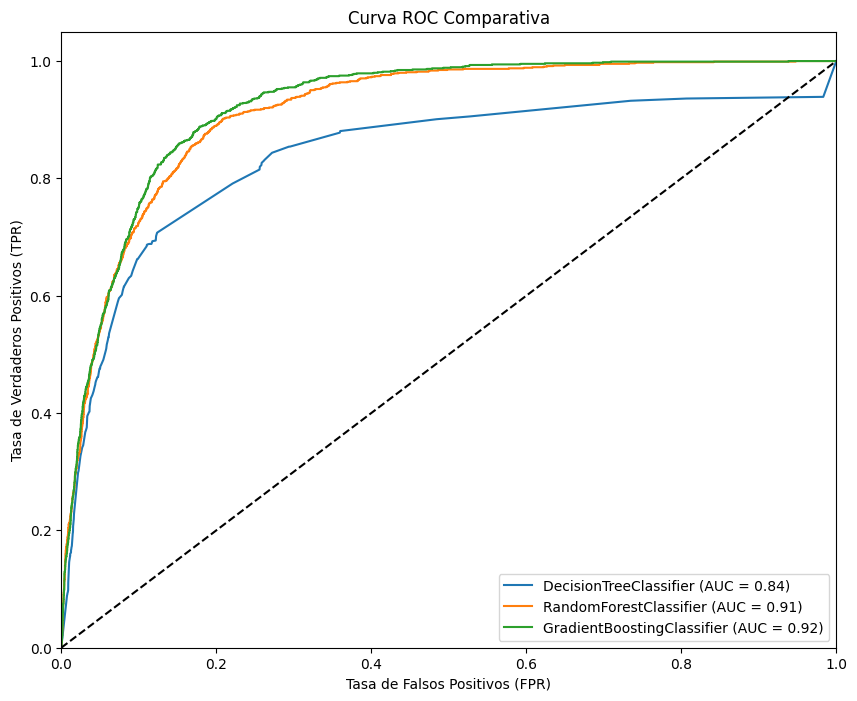

In [ ]:
# Curva ROC comparativa entre los modelos

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded_normalized, y_encoded, test_size=0.2, random_state=33)


plt.figure(figsize=(10, 8))

# Iteramos sobre cada clasificador
for index, row in df_comparacion_metricas.iterrows():
    clasificador = row['Clasificador']

    if clasificador == 'DecisionTreeClassifier':
        modelo = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=33)  # Ajusta los parámetros según tu df
    elif clasificador == 'RandomForestClassifier':
        modelo = RandomForestClassifier(n_estimators=100, max_features=20, max_depth=10, random_state=33)  # Ajusta los parámetros según tu df
    elif clasificador == 'GradientBoostingClassifier':
        modelo = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=10, random_state=33)  # Ajusta los parámetros según tu df

    modelo.fit(X_train, y_train.values.ravel())

    # Obtenemos las probabilidades para la curva ROC
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Calculamos la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Graficamos la curva ROC
    plt.plot(fpr, tpr, label=f'{clasificador} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal punteada
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC Comparativa')
plt.legend(loc="lower right")
plt.show()